# This notebook is strictly for collecting gdpca factors and saving them. Do not add to this notebook!!!!

In [1]:
library(doParallel)
library(R.matlab)
library(ggplot2)
library(fda)
library(caTools)
library(repr)
library(MASS)

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen

Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot



In [2]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
# Read in pre_pmcao data
data = readMat('data/F141020-lfp-5min-1kHz.mat')
pre_pmcao = data$pre.pmcao

In [15]:
# Check the dimensions of the data
dim(pre_pmcao)

[1] 300000     32

# Test getting factors for first 3 epochs and validate

In [30]:
# # Test getting the factors for the first 3 epochs
# k = 2
# #test_epoch_factors = list()
# excludes = c(1:5, 7:8, 11:12, 14:16, 18:26, 28:32)

# ncores = 36
# cl <- makeCluster(ncores)
# registerDoParallel(cl)

# test_epoch_factors = foreach (i=1:3, .packages='gdpc', .combine='cbind') %dopar%{
#     fit <- gdpc(pre_pmcao[((i-1)*1000+1):(i*1000), excludes], k)
#     factor = (fit$f - mean(fit$f)) / sd(fit$f)
#     factor
# }
# stopCluster(cl)

# # Check length of test_epoch_factors
# dim(test_epoch_factors)

[1] 1000    3

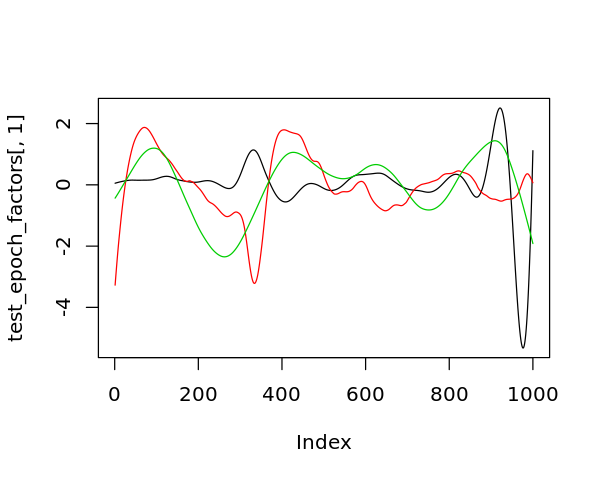

In [31]:
plot(test_epoch_factors[,1], type='l')
lines(test_epoch_factors[,2], col=2)
lines(test_epoch_factors[,3], col=3)

# Write factors to local disk as matrix for future work

In [76]:
# # Test writing matrix
# colnames(test_epoch_factors) = NULL
# write.matrix(test_epoch_factors,'gdpca_test_factors.rmat', sep='\t')

# testmat <- as.matrix(read.table("gdpca_test_factors.rmat", as.is = TRUE))

# # make mat2 a true matrix
# colnames(testmat) <- NULL
# testmat <- unname(testmat)
# dim(test_epoch_factors) == dim(testmat)

[1] TRUE TRUE

In [79]:
dim(testmat)

[1] 1000    3

In [77]:
head(testmat)

0.05359410,-3.273232,-0.4331513
0.05746213,-3.096411,-0.4119083
0.06134977,-2.922882,-0.3905210
0.06522032,-2.752570,-0.3690108
0.06904287,-2.585525,-0.3473834
0.07280069,-2.422046,-0.3256544


# Create log periodograms of the factors and test functional box plot

In [131]:
# Collect log periodograms of factors for each epoch
gpca_log_periodograms <- function(factors, tlim=500) {
    logpd.list <- c()
    for (i in 1:3) {
        factor_epoch = factors[, i]
        periodogram = (abs(fft(factor_epoch)))^2
        log_pd = log(periodogram[1:tlim])
        logpd.list[[i]] = log_pd
    }
    res <- do.call(cbind, logpd.list)
    return (res)
}


In [132]:
X = gpca_log_periodograms(testmat)

In [133]:
dim(X)

[1] 500   3

In [134]:
c(min(X), max(X))

[1]     -Inf 12.34648

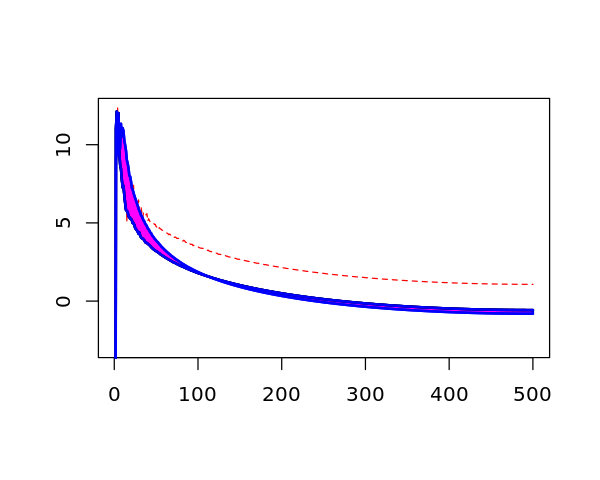

In [136]:
# Functional Box plot
t.grp1=fbplot(X,method='MBD',ylab="",xlab="", ylim=c(-3, max(X)))